In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf # (For econometrics approach we use statsmodels package)

sns.set()  #if you want to use seaborn themes with matplotlib functions

warnings.filterwarnings('ignore')

In [2]:
#1
df = pd.read_csv('/content/Logan_housing.csv')

df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [3]:
#2
# Drop columns
df.drop(['Garage Capacity', 'Irregular Shape', 'Zip', 'Sold Terms', 'month_sold', "Year Built", "year_sold"], axis=1, inplace=True)

# Check for missing values
df.isnull().sum()

,0
Sold Price,0
DOM,0
HOA Fee,0
Quadrant,0
School District,0
Total Bedrooms,0
Total Bathrooms,0
Total Square Feet,0
built_after_2000,0


In [4]:
#3
df.info()

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   HOA Fee            4110 non-null   int64 
 3   Quadrant           4110 non-null   object
 4   School District    4110 non-null   object
 5   Total Bedrooms     4110 non-null   int64 
 6   Total Bathrooms    4110 non-null   int64 
 7   Total Square Feet  4110 non-null   int64 
 8   built_after_2000   4110 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 289.1+ KB


,0
Sold Price,1217
DOM,248
HOA Fee,96
Quadrant,4
School District,2
Total Bedrooms,9
Total Bathrooms,7
Total Square Feet,2009
built_after_2000,2


In [5]:
#4
categorical = ["Quadrant", "School District", "built_after_2000"]

numeric = df.columns.difference(categorical)

for col in numeric:
  df[col] = df[col].astype('float')


for col in categorical:
  df[col] = df[col].astype('category')

  df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   float64 
 1   DOM                4110 non-null   float64 
 2   HOA Fee            4110 non-null   float64 
 3   Quadrant           4110 non-null   category
 4   School District    4110 non-null   object  
 5   Total Bedrooms     4110 non-null   float64 
 6   Total Bathrooms    4110 non-null   float64 
 7   Total Square Feet  4110 non-null   float64 
 8   built_after_2000   4110 non-null   int64   
dtypes: category(1), float64(6), int64(1), object(1)
memory usage: 261.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   float64 
 1   DOM                4

In [6]:
#5.1
df["DOM"].describe()

,DOM
count,4110.000000
mean,40.550608
std,51.571991
min,1.000000
25%,6.000000
50%,23.000000
75%,56.000000
max,712.000000


The range(max-min) is, which is 712.00-1.00, 711.00 DOM.

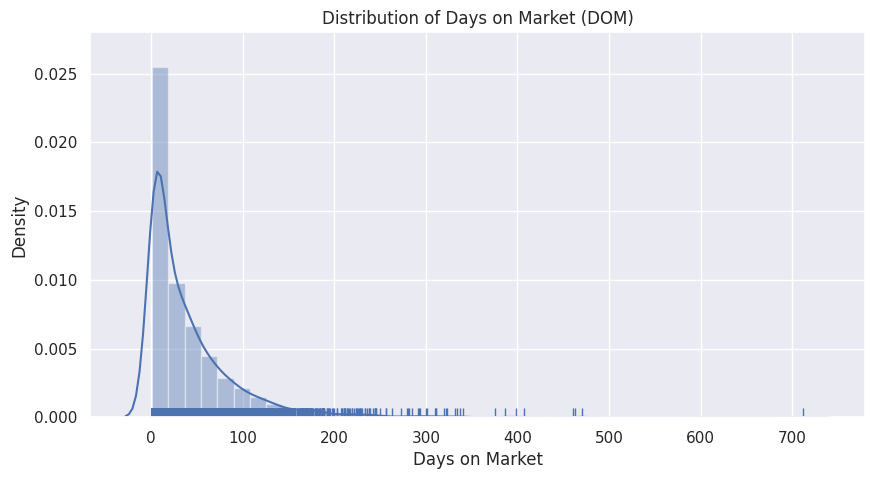

In [8]:
#5.2

plt.figure(figsize=(10, 5))
sns.distplot(df['DOM'], bins=40, rug=True)
plt.title('Distribution of Days on Market (DOM)')
plt.xlabel('Days on Market')
plt.ylabel('Density')
plt.show()


The data for "DOM" is right-skewed to and indicates that houses are sold more frequently during days 20-50. It is far from normal distribution which would be a bell shaped curve.


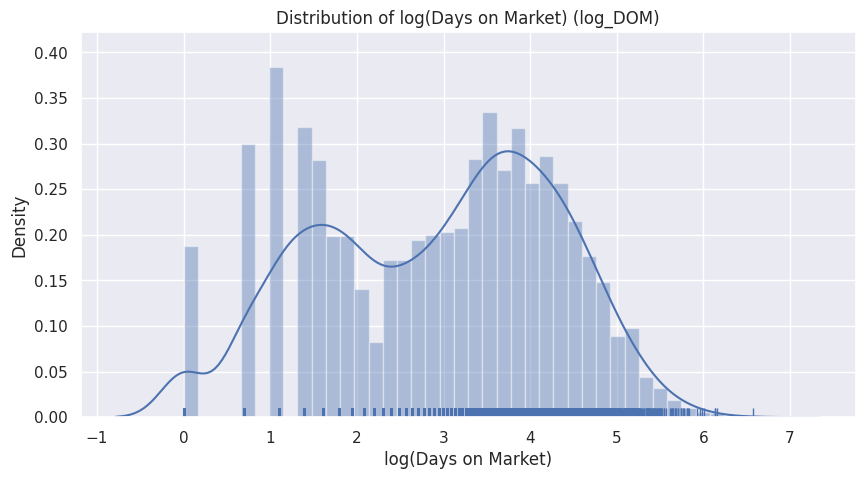

In [9]:
#5.3 needs work
# Apply log transformation to DOM
df['log_DOM'] = np.log(df['DOM'])

# Plot the distribution of log(DOM)
plt.figure(figsize=(10, 5))
sns.distplot(df['log_DOM'], bins=40, rug=True)
plt.title('Distribution of log(Days on Market) (log_DOM)')
plt.xlabel('log(Days on Market)')
plt.ylabel('Density')
plt.show()


The data is bimodal meaning it has two peaks and still not normally distributed.

In [10]:
#6
# Replace spaces with underscores in column names
df.columns = df.columns.str.replace(' ', '_')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold_Price         4110 non-null   float64 
 1   DOM                4110 non-null   float64 
 2   HOA_Fee            4110 non-null   float64 
 3   Quadrant           4110 non-null   category
 4   School_District    4110 non-null   category
 5   Total_Bedrooms     4110 non-null   float64 
 6   Total_Bathrooms    4110 non-null   float64 
 7   Total_Square_Feet  4110 non-null   float64 
 8   built_after_2000   4110 non-null   category
 9   log_DOM            4110 non-null   float64 
dtypes: category(3), float64(7)
memory usage: 237.4 KB


In [12]:
#7.1
# Build the regression model
reg1 = smf.ols('DOM ~  Sold_Price +  HOA_Fee +  Total_Bedrooms +  Total_Bathrooms + Total_Square_Feet +  Quadrant +  School_District +  built_after_2000', data=df).fit()

#7.3
print(reg1.summary())


                            OLS Regression Results                            
Dep. Variable:                    DOM   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     47.45
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           2.73e-90
Time:                        03:16:16   Log-Likelihood:                -21812.
No. Observations:                4110   AIC:                         4.365e+04
Df Residuals:                    4099   BIC:                         4.372e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

#7.4

Quadrant SW is selling the fastest with a coefficeint with the biggest difference from the intercept.

In [14]:
#7.5
# Get the coefficient for HOA_Fee
hoa_fee_coef = reg1.params['HOA_Fee']

# Calculate the change in DOM for a $100 increase in HOA_Fee
change_in_dom = hoa_fee_coef * 100

print(f"If HOA fee increases by $100, the average DOM is expected to change by {change_in_dom:.2f} days.")


If HOA fee increases by $100, the average DOM is expected to change by 5.86 days.


In [15]:
df['HOA_Fee'].describe()

,HOA_Fee
count,4110.000000
mean,36.178345
std,69.565512
min,0.000000
25%,0.000000
50%,0.000000
75%,65.000000
max,1050.000000


If HOA fees incread by 100 then the expected change moves by 5.86 days, which is not reasonable considering a small adjustment in price change which isa fraction of the price of a home.

In [13]:
#7.2

# Build the regression model with log_DOM as the dependent variable
reg2 = smf.ols('log_DOM ~  Sold_Price +  HOA_Fee +  Total_Bedrooms +  Total_Bathrooms + Total_Square_Feet +  Quadrant +  School_District +  built_after_2000', data=df).fit()

#7.3
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_DOM   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     43.11
Date:                Wed, 18 Sep 2024   Prob (F-statistic):           6.17e-82
Time:                        03:17:09   Log-Likelihood:                -6944.5
No. Observations:                4110   AIC:                         1.391e+04
Df Residuals:                    4099   BIC:                         1.398e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [18]:
#7.6
# Get the coefficient for Total_Bedrooms
total_bedrooms_coef = reg2.params['Total_Bedrooms']

print(f"For every additional bedroom, the log of DOM is expected to change by {total_bedrooms_coef:.4f}.")

# To get a better understanding of the impact on DOM, we can exponentiate the coefficient:
import math
change_in_dom = math.exp(total_bedrooms_coef) - 1
print(f"For every additional bedroom, the DOM is expected to change by {change_in_dom:.2f}%")



For every additional bedroom, the log of DOM is expected to change by -0.0388.
For every additional bedroom, the DOM is expected to change by -0.04%


#7.6

The small increase is expected because more rooms means a higher increase in price which would result in a longer days on the market.

In [19]:
#8.1
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

# Predict DOM using the model
predictions = reg1.predict(df)

# Calculate MAE
mae = mean_absolute_error(df['DOM'], predictions)
print(f'MAE: {mae}')

# Calculate MSE
mse = mean_squared_error(df['DOM'], predictions)
print(f'MSE: {mse}')

# Calculate RMSE
rmse = math.sqrt(mse)
print(f'RMSE: {rmse}')

# Calculate RMSPE
rmspe = math.sqrt(np.mean(np.square((df['DOM'] - predictions) / df['DOM']))) * 100
print(f'RMSPE: {rmspe}')


MAE: 33.56984614164994
MSE: 2383.127964493403
RMSE: 48.817291654632
RMSPE: 831.6233955432083


#8.2

The RMSPE is 831.6 meaning on average the values predicted by the model deviated by 831.6 percent which indicates there could be an overfitting/underfitting problem, high variability among predictions which would take more hyper tuning, or potential isses with the dat or features that were selected. I also tried manually calculating the values so i can confidentely say it is one of the previous listed issues.

#8.3

An MAE of 33.57 is likely days which would be mean there was an average error of 33.57 days
THe unit of RMSE is 48.82 days meaning there was a typical prediction erro of 48.82 days.